In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import numpy as np

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.impute import KNNImputer

from sklearn.decomposition import PCA

from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("Employee_Attrition.csv")

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.920786,Yes,Travel_Rarely,990.110009,Sales,1.016716,1.770313,Life Sciences,1.033298,1.054148,...,1.012832,95.612654,0.000000,8.063833,0.000000,1.052104,5.795945,3.993896,0.000000,4.594972
1,51.589037,No,Travel_Frequently,276.776030,Research & Development,NaN,1.035333,Life Sciences,0.944859,2.107031,...,4.312008,85.370868,1.104642,8.965059,3.264952,2.526470,10.070232,7.937505,1.032295,5.901207
2,33.131540,Yes,Travel_Rarely,1204.158501,Research & Development,2.198662,2.118801,Other,0.810809,4.008125,...,2.332558,76.248084,0.000000,8.427238,3.004521,2.924784,0.000000,0.000000,0.000000,0.000000
3,34.707073,No,Travel_Frequently,1352.752432,Sales,2.937851,3.670674,Life Sciences,0.822976,4.587269,...,3.029591,75.888697,0.000000,7.662606,2.856001,3.117053,8.435324,5.563667,2.845429,0.000000
4,24.790188,No,Travel_Rarely,485.053333,Research & Development,1.988953,1.120496,Medical,NaN,7.228740,...,NaN,72.670937,0.953012,6.241733,2.814719,3.112317,2.040124,1.970786,2.495949,2.219353


In [4]:
df.shape

(1470, 35)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1323 non-null   float64
 1   Attrition                 1323 non-null   object 
 2   BusinessTravel            1323 non-null   object 
 3   DailyRate                 1323 non-null   float64
 4   Department                1323 non-null   object 
 5   DistanceFromHome          1323 non-null   float64
 6   Education                 1323 non-null   float64
 7   EducationField            1323 non-null   object 
 8   EmployeeCount             1323 non-null   float64
 9   EmployeeNumber            1323 non-null   float64
 10  EnvironmentSatisfaction   1323 non-null   float64
 11  Gender                    1323 non-null   object 
 12  HourlyRate                1323 non-null   float64
 13  JobInvolvement            1323 non-null   float64
 14  JobLevel

Checking for null values

In [6]:
df.isnull().sum()

Age                         147
Attrition                   147
BusinessTravel              147
DailyRate                   147
Department                  147
DistanceFromHome            147
Education                   147
EducationField              147
EmployeeCount               147
EmployeeNumber              147
EnvironmentSatisfaction     147
Gender                      147
HourlyRate                  147
JobInvolvement              147
JobLevel                    147
JobRole                     147
JobSatisfaction             147
MaritalStatus               147
MonthlyIncome               147
MonthlyRate                 147
NumCompaniesWorked          147
Over18                      147
OverTime                    147
PercentSalaryHike           147
PerformanceRating           147
RelationshipSatisfaction    147
StandardHours               147
StockOptionLevel            147
TotalWorkingYears           147
TrainingTimesLastYear       147
WorkLifeBalance             147
YearsAtC

replace null values

it dipslays the distrubution of missing data accross the data set

<AxesSubplot:>

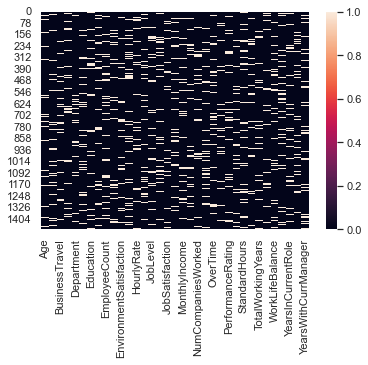

In [7]:
sns.heatmap(df.isnull())

No empty rows 

In [8]:
df.dropna(how='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.920786,Yes,Travel_Rarely,990.110009,Sales,1.016716,1.770313,Life Sciences,1.033298,1.054148,...,1.012832,95.612654,0.000000,8.063833,0.000000,1.052104,5.795945,3.993896,0.000000,4.594972
1,51.589037,No,Travel_Frequently,276.776030,Research & Development,NaN,1.035333,Life Sciences,0.944859,2.107031,...,4.312008,85.370868,1.104642,8.965059,3.264952,2.526470,10.070232,7.937505,1.032295,5.901207
2,33.131540,Yes,Travel_Rarely,1204.158501,Research & Development,2.198662,2.118801,Other,0.810809,4.008125,...,2.332558,76.248084,0.000000,8.427238,3.004521,2.924784,0.000000,0.000000,0.000000,0.000000
3,34.707073,No,Travel_Frequently,1352.752432,Sales,2.937851,3.670674,Life Sciences,0.822976,4.587269,...,3.029591,75.888697,0.000000,7.662606,2.856001,3.117053,8.435324,5.563667,2.845429,0.000000
4,24.790188,No,Travel_Rarely,485.053333,Research & Development,1.988953,1.120496,Medical,NaN,7.228740,...,NaN,72.670937,0.953012,6.241733,2.814719,3.112317,2.040124,1.970786,2.495949,2.219353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,37.421699,No,Travel_Frequently,914.061807,Research & Development,21.647903,NaN,Medical,0.950166,2142.083554,...,3.020184,85.835352,0.962354,NaN,3.451951,2.819336,5.436125,2.021736,0.000000,NaN
1466,34.957777,No,NaN,574.675152,Research & Development,6.027683,1.122961,Medical,1.064563,2221.578902,...,1.014690,94.868401,0.923291,NaN,5.122188,2.560634,7.428423,7.504109,0.860105,6.756705
1467,26.884296,No,Travel_Rarely,151.506083,Research & Development,NaN,3.478895,Life Sciences,0.960908,NaN,...,1.952083,93.310094,1.096556,6.278564,0.000000,2.587121,5.965205,1.822679,0.000000,3.271091
1468,NaN,No,Travel_Frequently,995.977086,Human Resources,2.094496,2.956093,Medical,0.873312,2086.654641,...,4.182100,83.920873,0.000000,15.235372,3.338546,1.989767,7.738712,6.562611,0.000000,NaN


Below, the previous "na" value has now been converted to a Pandas NaN value.  Converting to a NaN makes these values more recognisable for further investigation.

In [9]:
missing_value_formats = ["n.a.","NA","na","n/a","n\a","?","--"]
mvf_df = pd.read_csv("Employee_Attrition.csv", na_values = missing_value_formats)


In [10]:
mvf_df.shape

(1470, 35)

filling the blank spaces to null values. no affect on the data but numerical is recognzied

In [11]:
df.fillna(0)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.920786,Yes,Travel_Rarely,990.110009,Sales,1.016716,1.770313,Life Sciences,1.033298,1.054148,...,1.012832,95.612654,0.000000,8.063833,0.000000,1.052104,5.795945,3.993896,0.000000,4.594972
1,51.589037,No,Travel_Frequently,276.776030,Research & Development,0.000000,1.035333,Life Sciences,0.944859,2.107031,...,4.312008,85.370868,1.104642,8.965059,3.264952,2.526470,10.070232,7.937505,1.032295,5.901207
2,33.131540,Yes,Travel_Rarely,1204.158501,Research & Development,2.198662,2.118801,Other,0.810809,4.008125,...,2.332558,76.248084,0.000000,8.427238,3.004521,2.924784,0.000000,0.000000,0.000000,0.000000
3,34.707073,No,Travel_Frequently,1352.752432,Sales,2.937851,3.670674,Life Sciences,0.822976,4.587269,...,3.029591,75.888697,0.000000,7.662606,2.856001,3.117053,8.435324,5.563667,2.845429,0.000000
4,24.790188,No,Travel_Rarely,485.053333,Research & Development,1.988953,1.120496,Medical,0.000000,7.228740,...,0.000000,72.670937,0.953012,6.241733,2.814719,3.112317,2.040124,1.970786,2.495949,2.219353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,37.421699,No,Travel_Frequently,914.061807,Research & Development,21.647903,0.000000,Medical,0.950166,2142.083554,...,3.020184,85.835352,0.962354,0.000000,3.451951,2.819336,5.436125,2.021736,0.000000,0.000000
1466,34.957777,No,0,574.675152,Research & Development,6.027683,1.122961,Medical,1.064563,2221.578902,...,1.014690,94.868401,0.923291,0.000000,5.122188,2.560634,7.428423,7.504109,0.860105,6.756705
1467,26.884296,No,Travel_Rarely,151.506083,Research & Development,0.000000,3.478895,Life Sciences,0.960908,0.000000,...,1.952083,93.310094,1.096556,6.278564,0.000000,2.587121,5.965205,1.822679,0.000000,3.271091
1468,0.000000,No,Travel_Frequently,995.977086,Human Resources,2.094496,2.956093,Medical,0.873312,2086.654641,...,4.182100,83.920873,0.000000,15.235372,3.338546,1.989767,7.738712,6.562611,0.000000,0.000000


created new dataset with clean values

In [12]:
df1 = df.fillna(0)

we have no missing values now

<AxesSubplot:>

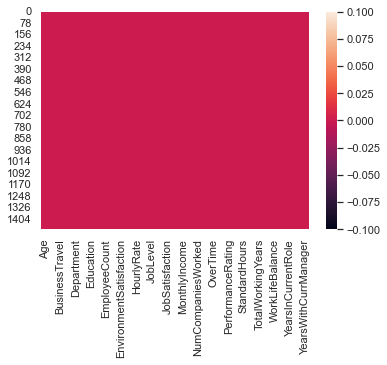

In [13]:
sns.heatmap(df1.isnull())

In [14]:
df1.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

giving is the mean and all statisctical. min values are 0 as they've been replaced those are blank spaces

In [15]:
df1.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,32.971742,721.827045,8.181987,2.631102,0.899393,924.011249,2.453799,59.082950,2.468725,1.852443,...,2.448388,72.217182,0.733281,10.283537,2.530580,2.486543,6.240261,3.810027,1.944639,3.705925
std,14.448524,460.651667,8.223663,1.343239,0.314448,655.990584,1.348310,28.336414,1.097763,1.234750,...,1.336886,25.254607,0.854485,8.393533,1.517110,1.099875,6.102017,3.695499,3.124085,3.626519
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.382132,337.872583,1.806068,1.869598,0.902759,337.366696,1.129673,41.511377,1.975832,0.982039,...,1.113239,72.431758,0.000000,4.782824,1.850949,1.987039,1.828520,0.855287,0.000000,0.000000
50%,33.838002,705.983557,5.543003,2.911561,0.985280,896.470626,2.707317,61.361038,2.779384,1.836254,...,2.749160,79.112687,0.856451,8.667682,2.339946,2.811240,4.845941,2.304817,0.910478,2.290746
75%,41.714666,1101.063049,11.525354,3.598201,1.059647,1469.776833,3.501999,81.466110,3.139241,2.310216,...,3.475659,84.947190,1.057531,14.198518,3.262780,3.169524,8.797517,6.756694,2.121911,6.739316
max,69.402515,1784.394456,33.684424,6.285161,1.290613,2530.919375,5.254672,123.200439,5.241968,5.942269,...,5.092280,107.378705,3.474319,47.641892,7.503201,4.856086,36.848408,19.091844,17.273662,19.976003


Data preparatation first step

In [16]:
df1.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.028052,-0.036618,0.081529,-0.026383,-0.030474,-0.024854,0.001864,-0.055866,0.215770,...,0.003000,-0.046125,0.014810,0.316595,-0.038530,0.009974,0.121230,0.070095,0.083768,0.078799
DailyRate,0.028052,1.000000,0.023428,0.020786,0.022298,-0.024524,-0.015053,0.011655,0.065757,0.000955,...,0.025481,-0.022667,0.012675,0.024919,-0.004061,-0.011959,-0.002265,0.013342,-0.000509,-0.036278
DistanceFromHome,-0.036618,0.023428,1.000000,0.015165,0.001451,0.048002,-0.014267,-0.010860,-0.000883,0.019101,...,0.016347,0.050374,0.037250,-0.006156,-0.019840,-0.005414,0.021382,0.016737,-0.029420,0.040214
Education,0.081529,0.020786,0.015165,1.000000,0.001930,0.021058,-0.034034,0.003697,-0.008489,0.049871,...,0.028123,0.005814,-0.016004,0.079915,-0.055543,-0.017137,0.047875,0.057058,0.007848,0.030893
EmployeeCount,-0.026383,0.022298,0.001451,0.001930,1.000000,0.025783,0.012004,0.031029,0.006359,-0.002747,...,-0.007692,0.063290,0.011683,-0.001386,-0.015202,0.015662,-0.001912,0.023478,0.007370,0.002891
EmployeeNumber,-0.030474,-0.024524,0.048002,0.021058,0.025783,1.000000,0.049608,0.010702,-0.006268,-0.012114,...,-0.036112,0.020723,0.042559,-0.053061,-0.013333,0.008126,0.000336,-0.023484,-0.012061,-0.023601
EnvironmentSatisfaction,-0.024854,-0.015053,-0.014267,-0.034034,0.012004,0.049608,1.000000,-0.029162,-0.005198,0.017123,...,0.020143,-0.002717,-0.022800,0.001955,0.022602,0.021358,0.005034,0.028415,-0.028690,0.003527
HourlyRate,0.001864,0.011655,-0.010860,0.003697,0.031029,0.010702,-0.029162,1.000000,0.013335,-0.040719,...,-0.009224,0.020666,0.034436,0.042284,-0.000757,-0.001408,0.050996,-0.000520,-0.008720,0.025874
JobInvolvement,-0.055866,0.065757,-0.000883,-0.008489,0.006359,-0.006268,-0.005198,0.013335,1.000000,-0.020536,...,0.021403,0.027833,-0.027865,-0.007747,0.005022,0.041435,-0.018091,0.004008,-0.001505,0.052459
JobLevel,0.215770,0.000955,0.019101,0.049871,-0.002747,-0.012114,0.017123,-0.040719,-0.020536,1.000000,...,-0.002399,-0.011285,-0.009754,0.554479,0.012995,0.008364,0.339357,0.277636,0.247949,0.260186


dark ones show correlation btw features

<AxesSubplot:>

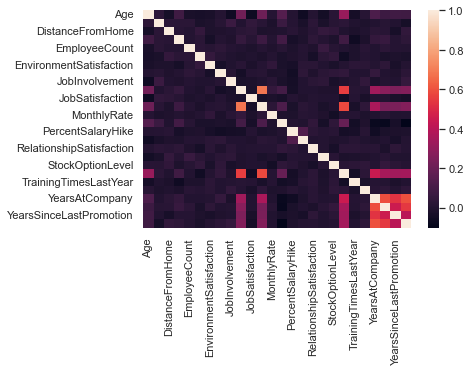

In [17]:
sns.heatmap(df1.corr())

<AxesSubplot:>

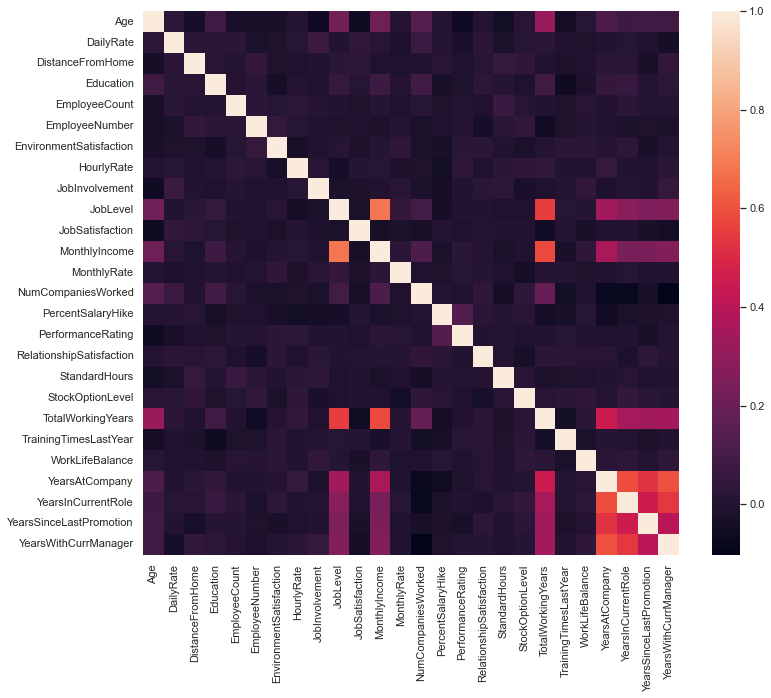

In [18]:
plt.figure(figsize=(12,10))
sns.heatmap(df1.corr(),annot=False)

I see important features now which is in the range of 0.6 to 1 and those we're filtering now

In [19]:
!pip install fasteda

Defaulting to user installation because normal site-packages is not writeable


this is library that helps to perform EDA more effecttively source: https://pypi.org/project/fasteda/

DataFrame Head:


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.920786,Yes,Travel_Rarely,990.110009,Sales,1.016716,1.770313,Life Sciences,1.033298,1.054148,2.146294,Male,93.827486,3.426960,2.464492,Sales Executive,3.397665,Single,6438.949336,20845.103714,7.077818,Y,Yes,9.898765,2.844897,1.012832,95.612654,0.000000,8.063833,0.000000,1.052104,5.795945,3.993896,0.000000,4.594972
1,51.589037,No,Travel_Frequently,276.776030,Research & Development,0.000000,1.035333,Life Sciences,0.944859,2.107031,3.470803,Male,52.304157,1.813458,1.788697,Research Scientist,1.584059,Married,4457.659622,24877.898697,1.114423,Y,No,0.000000,4.120281,4.312008,85.370868,1.104642,8.965059,3.264952,2.526470,10.070232,7.937505,1.032295,5.901207
2,33.131540,Yes,Travel_Rarely,1204.158501,Research & Development,2.198662,2.118801,Other,0.810809,4.008125,3.979420,Male,87.271332,1.877226,0.833488,Laboratory Technician,3.301009,Single,2124.545220,2262.942954,5.539591,Y,Yes,15.401596,2.781168,2.332558,76.248084,0.000000,8.427238,3.004521,2.924784,0.000000,0.000000,0.000000,0.000000


DataFrame Tail:


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1467,26.884296,No,Travel_Rarely,151.506083,Research & Development,0.000000,3.478895,Life Sciences,0.960908,0.000000,2.152282,Male,91.603642,4.394863,1.964613,Manufacturing Director,2.152039,Married,6609.842365,0.000000,1.017623,Y,Yes,18.744411,0.000000,1.952083,93.310094,1.096556,6.278564,0.000000,2.587121,5.965205,1.822679,0.000000,3.271091
1468,0.000000,No,Travel_Frequently,995.977086,Human Resources,2.094496,2.956093,Medical,0.873312,2086.654641,4.095580,Male,59.110216,2.019760,1.925025,Sales Executive,0.000000,Married,5585.302599,11837.891371,1.591695,0,No,12.930373,3.221402,4.182100,83.920873,0.000000,15.235372,3.338546,1.989767,7.738712,6.562611,0.000000,0.000000
1469,38.133892,No,Travel_Rarely,703.677110,Research & Development,7.231661,3.292684,Medical,1.061133,0.000000,1.738502,Male,67.262829,4.478969,2.291543,Laboratory Technician,2.875309,Married,5188.877974,10276.024987,2.364262,Y,No,10.343964,3.053256,1.076817,82.610288,0.000000,6.493763,3.451604,4.376818,3.755110,3.308961,1.070952,2.025939


----------------------------------------------------------------------------------------------------
Missing values:


,0


----------------------------------------------------------------------------------------------------
Shape of DataFrame:

(1470, 35)

----------------------------------------------------------------------------------------------------
DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   float64
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1470 non-null   object 
 3   DailyRate                 1470 non-null   float64
 4   Department                1470 non-null   object 
 5   DistanceFromHome          1470 non-null   float64
 6   Education                 1470 non-null   float64
 7   EducationField            1470 non-null   object 
 8   EmployeeCount             1470 non-null   float64
 9   EmployeeNumber            1470 

,count,mean,median,std,min,25%,50%,75%,max,skewness,kurtosis
Age,1470,32.972,33.838,14.449,0,27.382,33.838,41.715,69.403,-0.690114,0.628090
DailyRate,1470,721.827,705.984,460.652,0,337.873,705.984,1101.063,1784.394,0.082641,-1.046448
DistanceFromHome,1470,8.182,5.543,8.224,0,1.806,5.543,11.525,33.684,1.105786,0.192373
Education,1470,2.631,2.912,1.343,0,1.87,2.912,3.598,6.285,-0.437815,-0.520737
EmployeeCount,1470,0.899,0.985,0.314,0,0.903,0.985,1.06,1.291,-2.227198,3.792174
EmployeeNumber,1470,924.011,896.471,655.991,0,337.367,896.471,1469.777,2530.919,0.163273,-1.136317
EnvironmentSatisfaction,1470,2.454,2.707,1.348,0,1.13,2.707,3.502,5.255,-0.288194,-0.947308
HourlyRate,1470,59.083,61.361,28.336,0,41.511,61.361,81.466,123.2,-0.489689,-0.293041
JobInvolvement,1470,2.469,2.779,1.098,0,1.976,2.779,3.139,5.242,-0.851416,0.366508
JobLevel,1470,1.852,1.836,1.235,0,0.982,1.836,2.31,5.942,0.792426,0.438986


----------------------------------------------------------------------------------------------------
DataFrame Correlation:



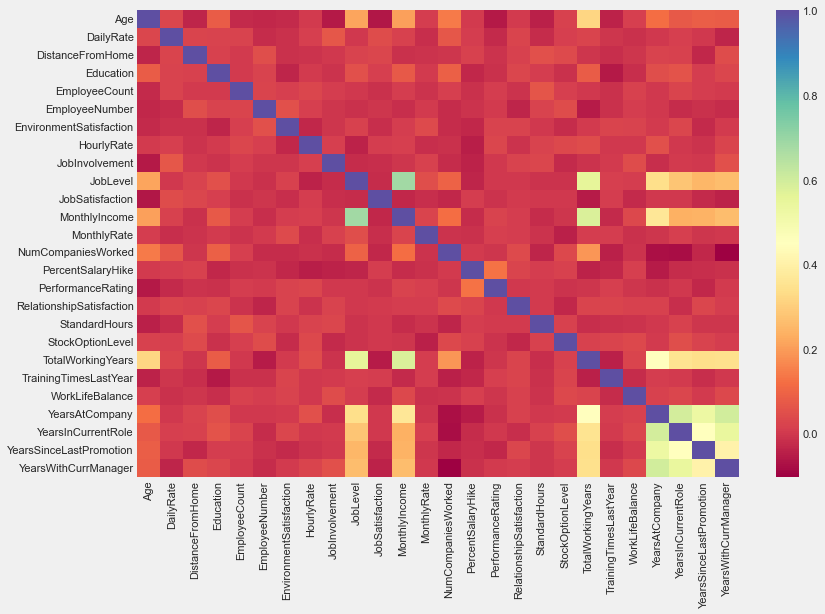

----------------------------------------------------------------------------------------------------
Histogram(s) & Boxplot(s):



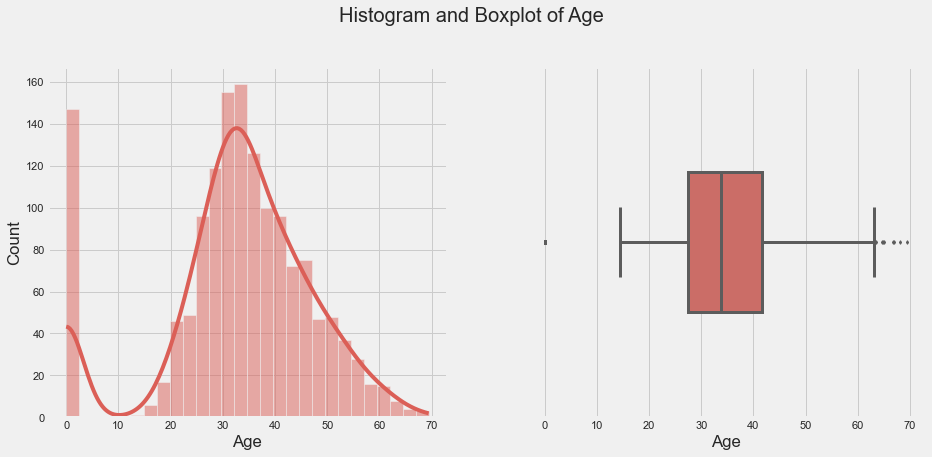

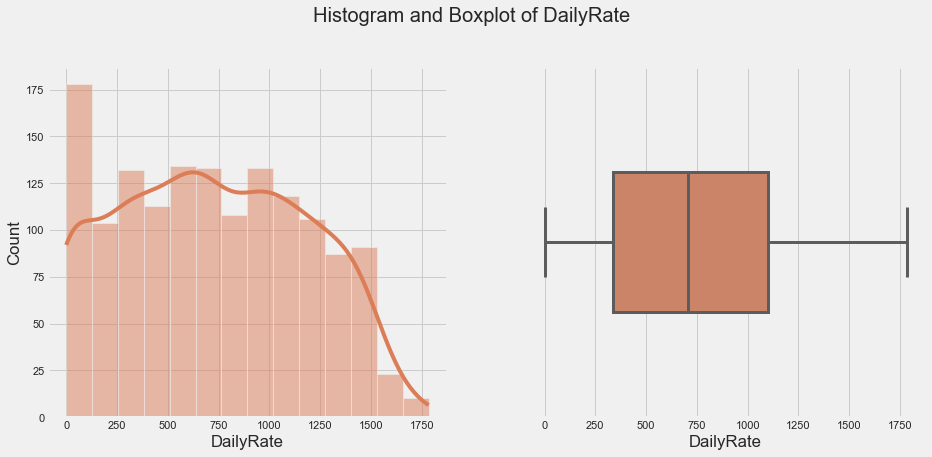

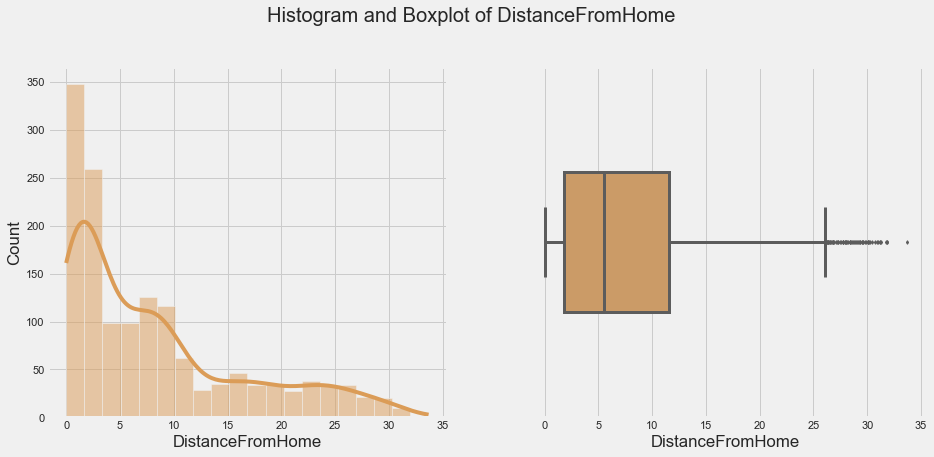

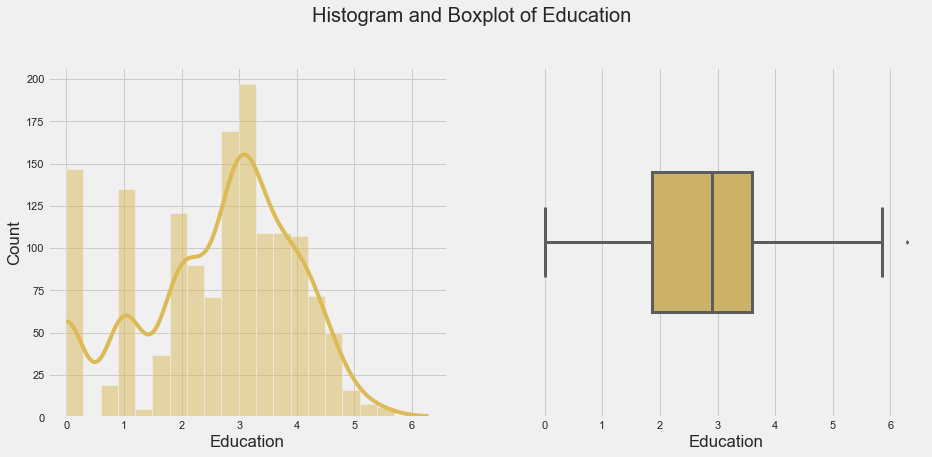

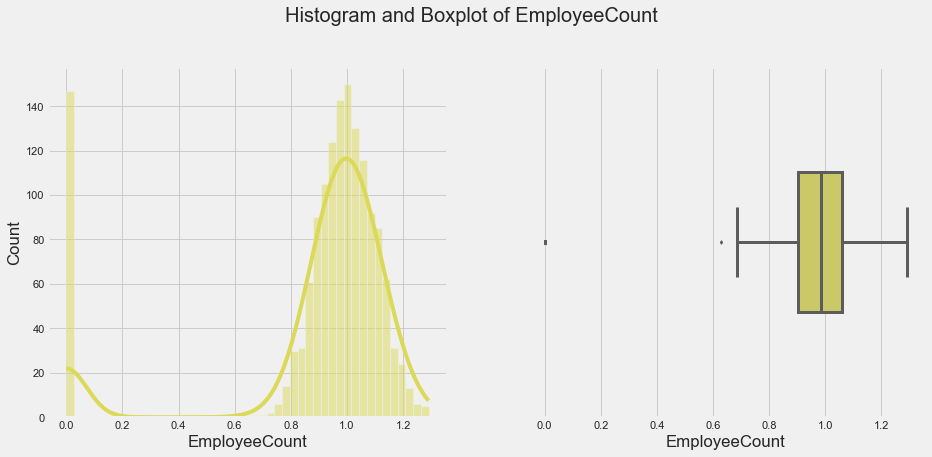

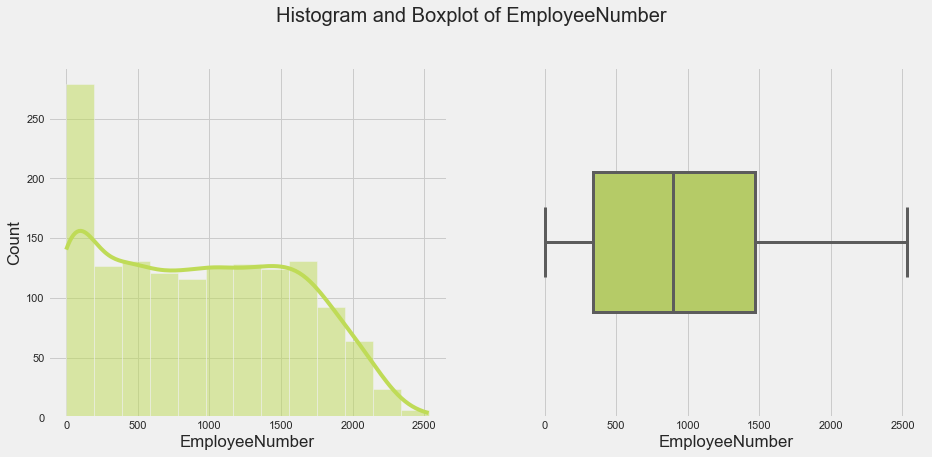

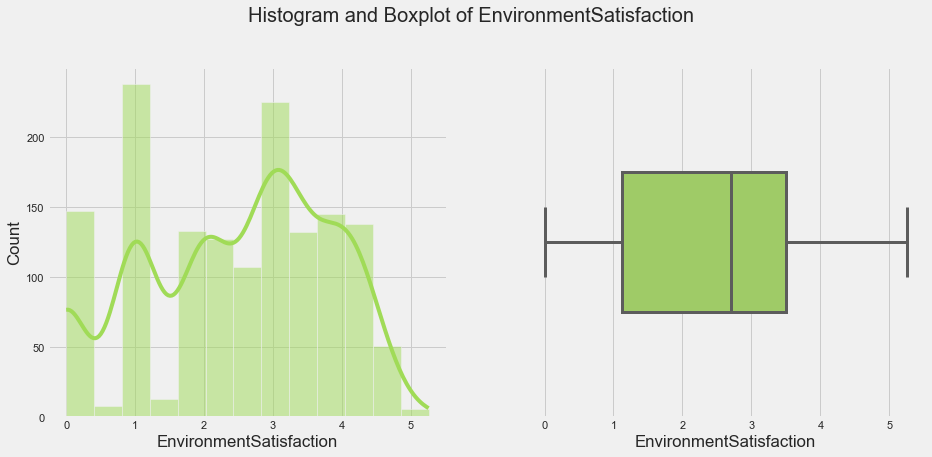

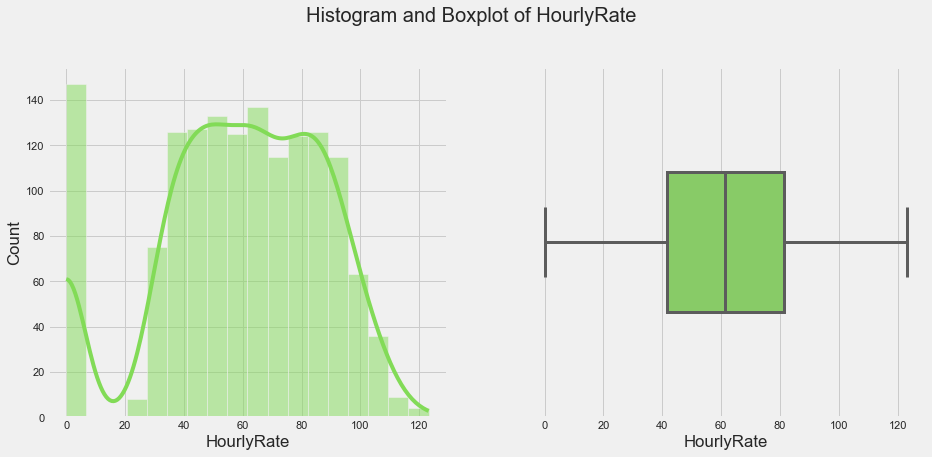

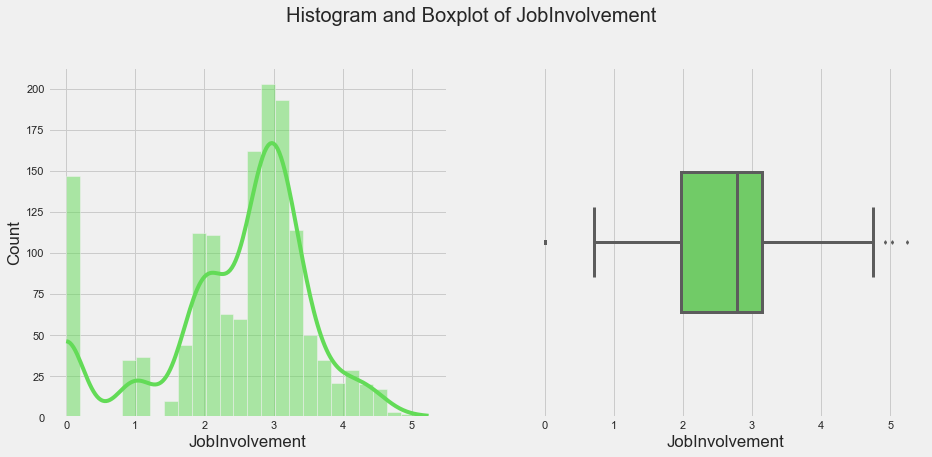

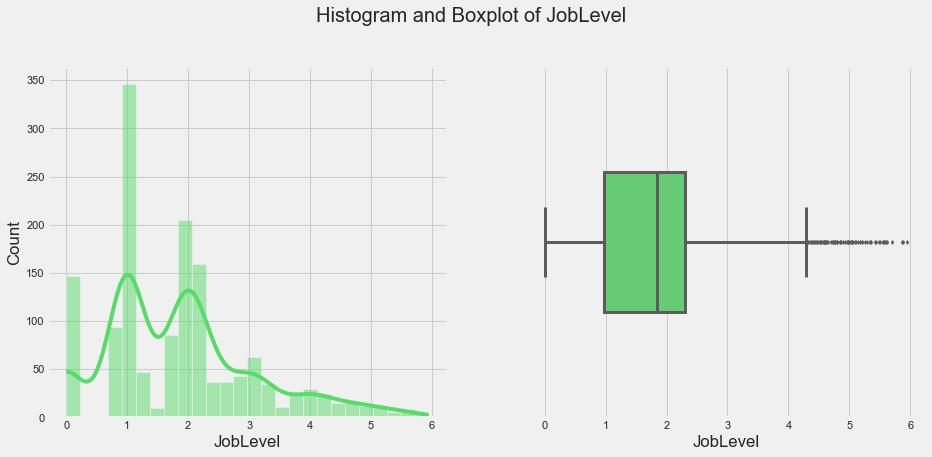

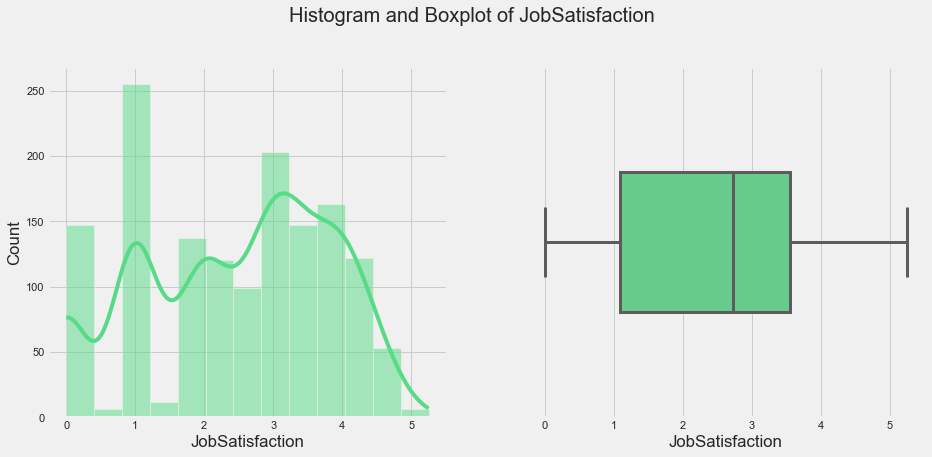

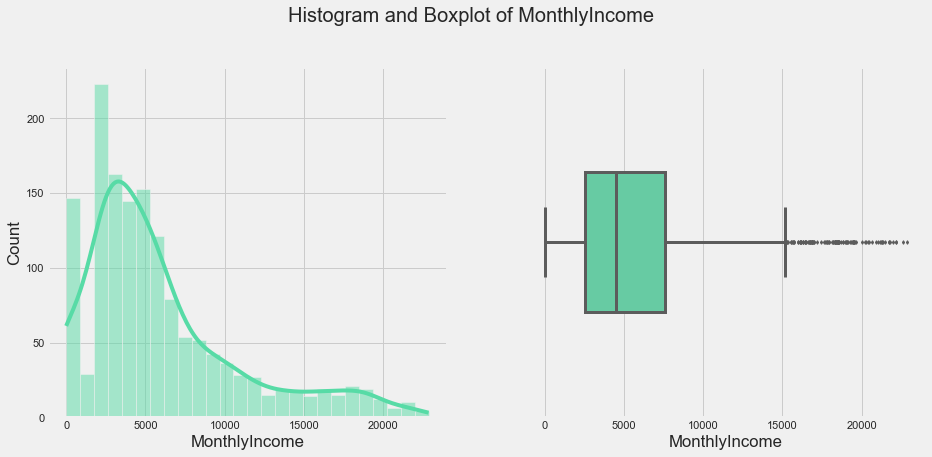

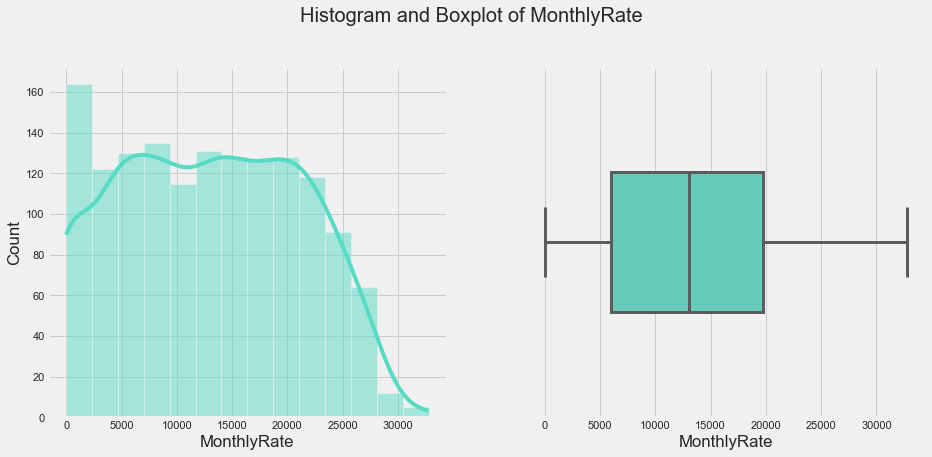

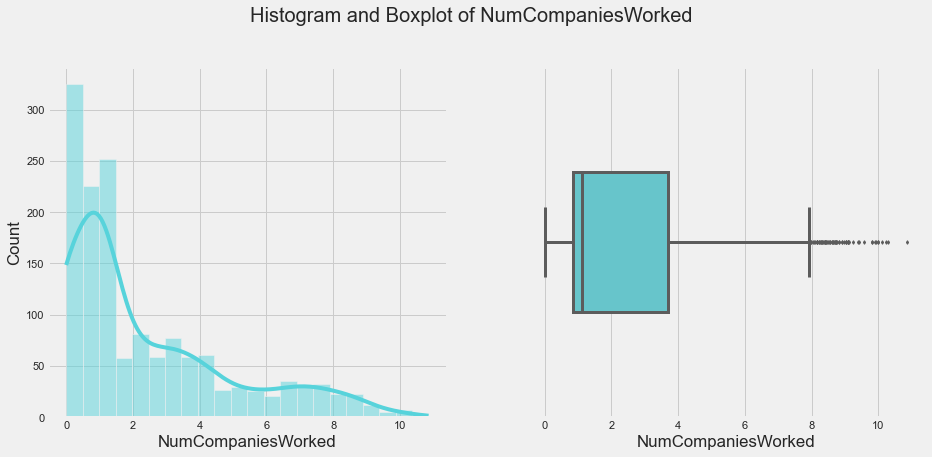

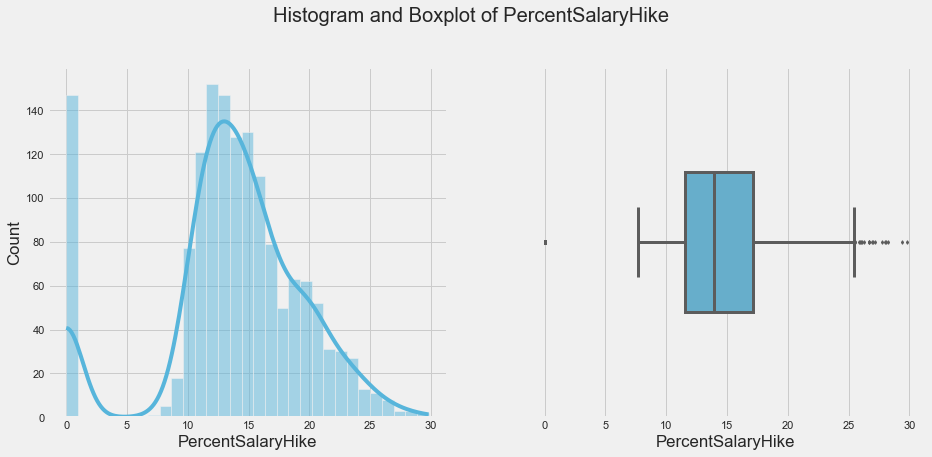

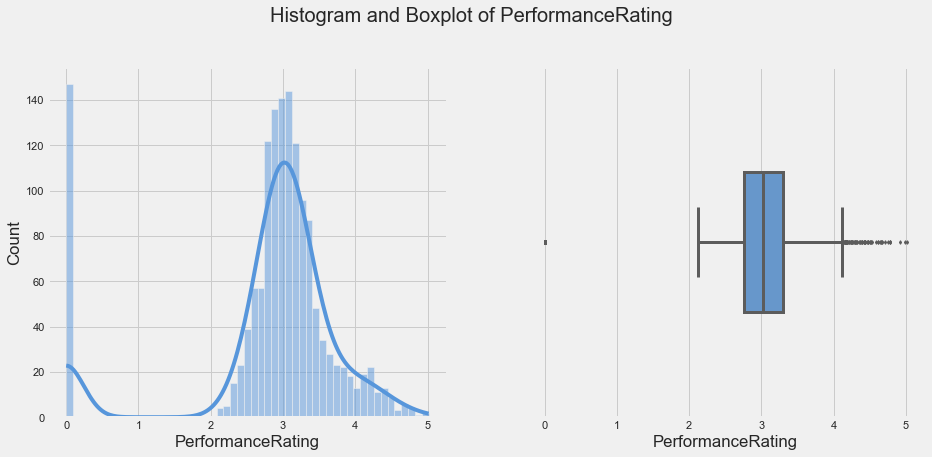

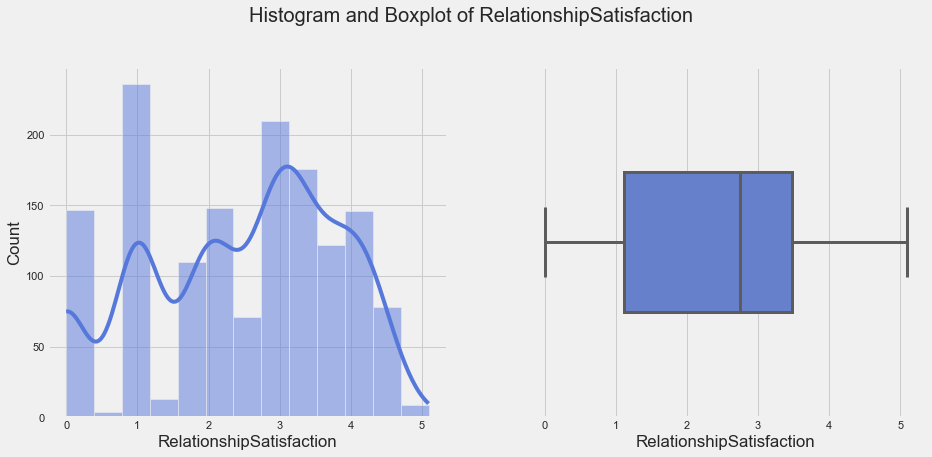

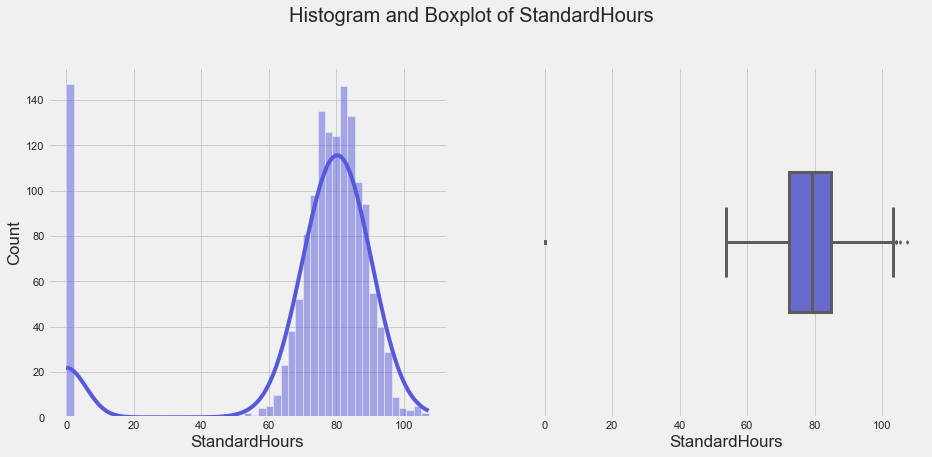

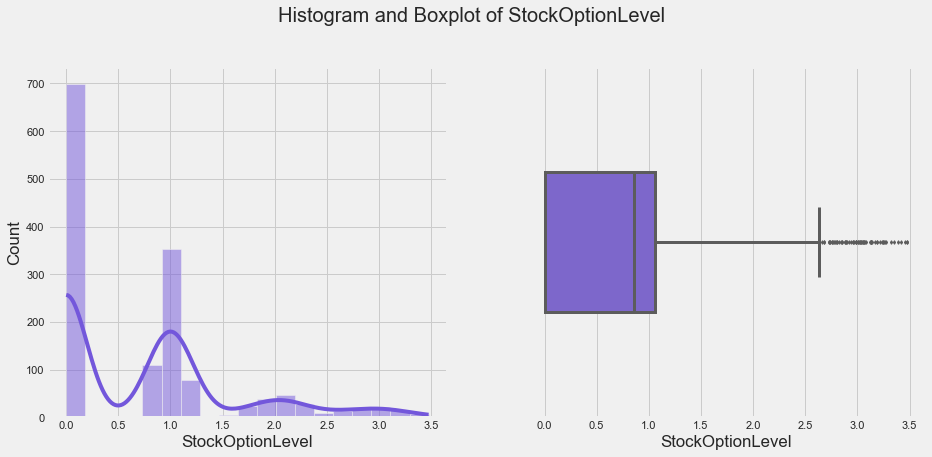

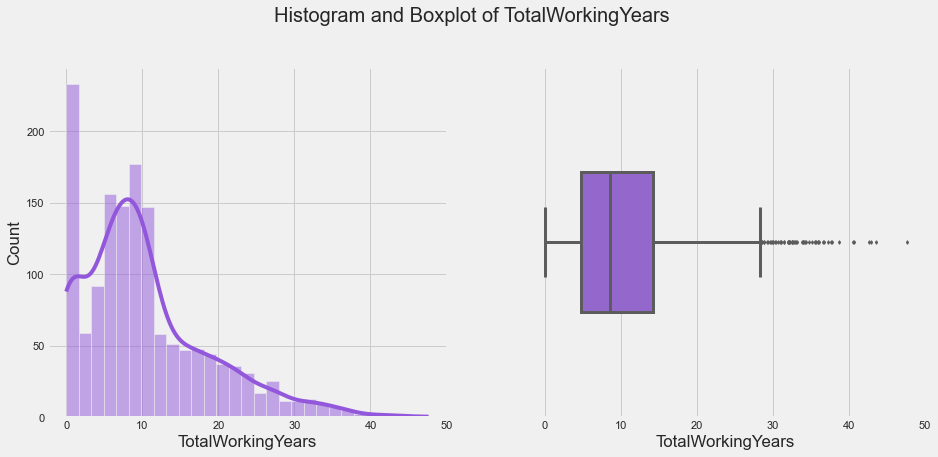

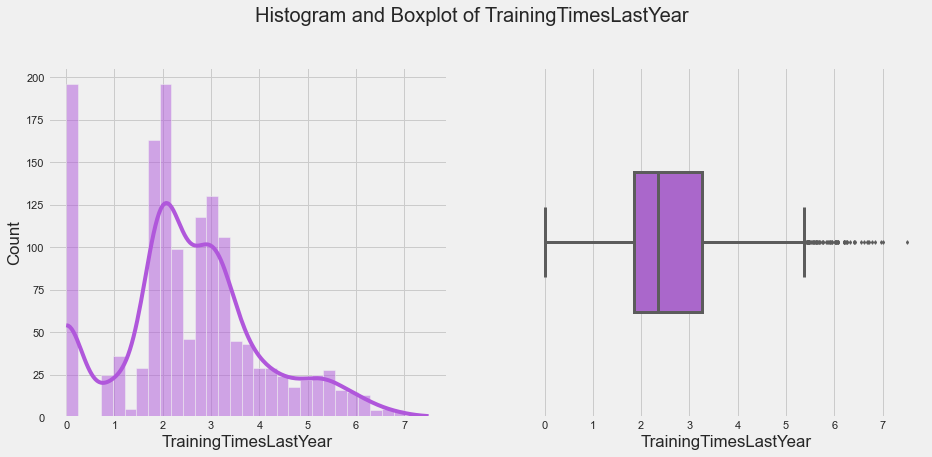

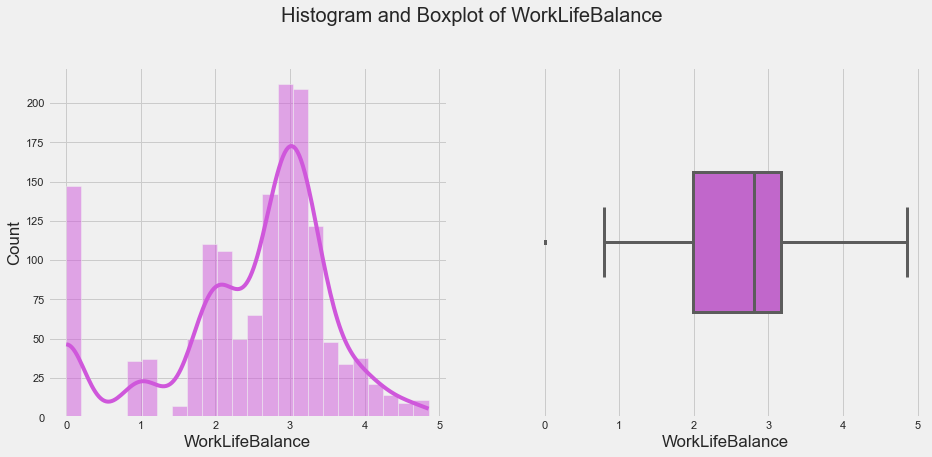

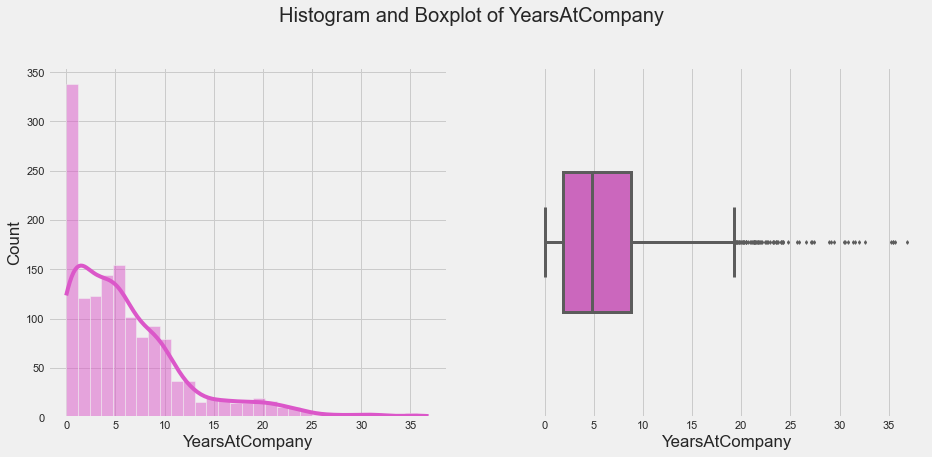

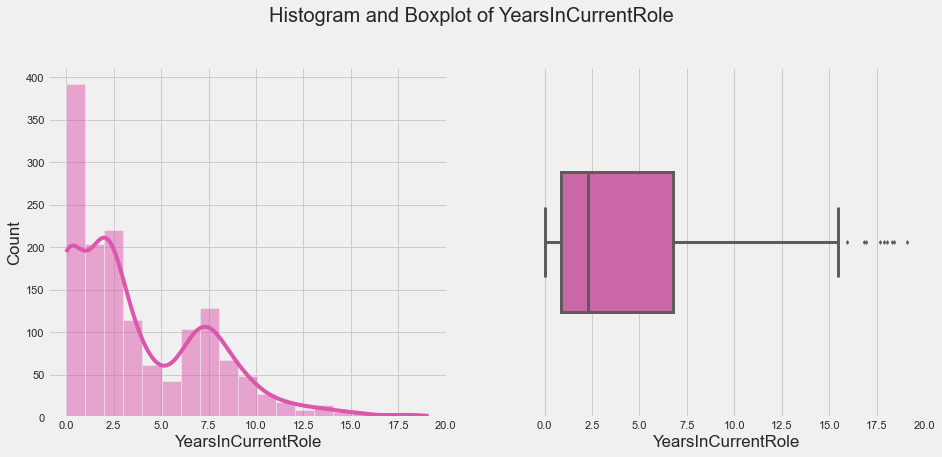

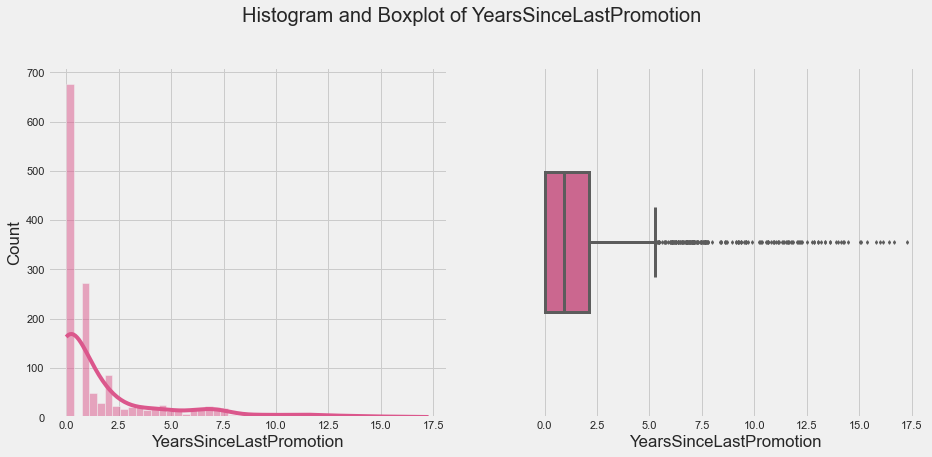

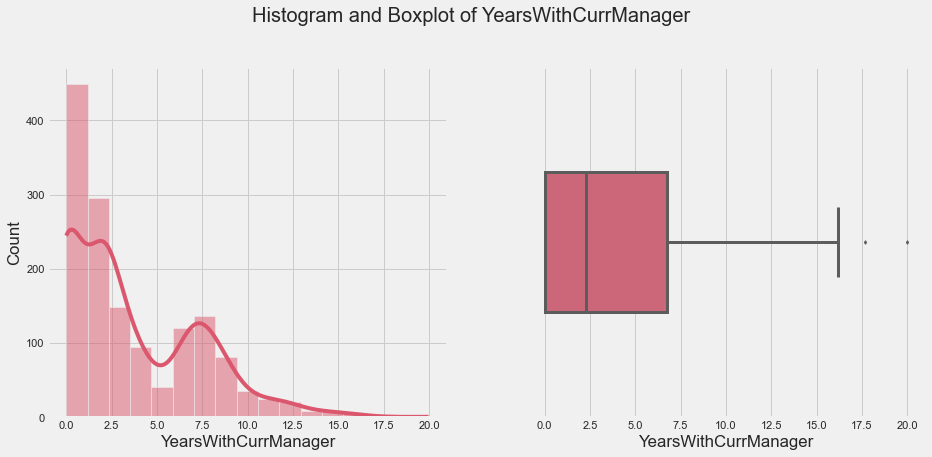

----------------------------------------------------------------------------------------------------
Countplot(s):



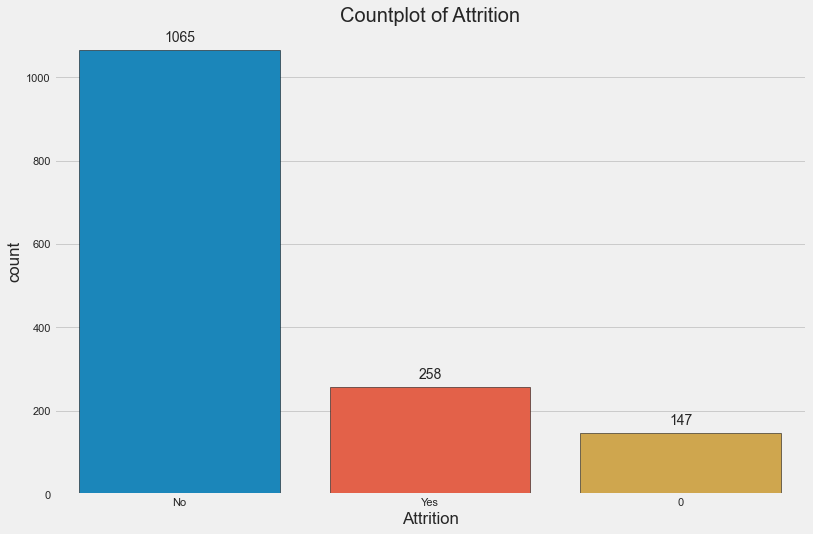

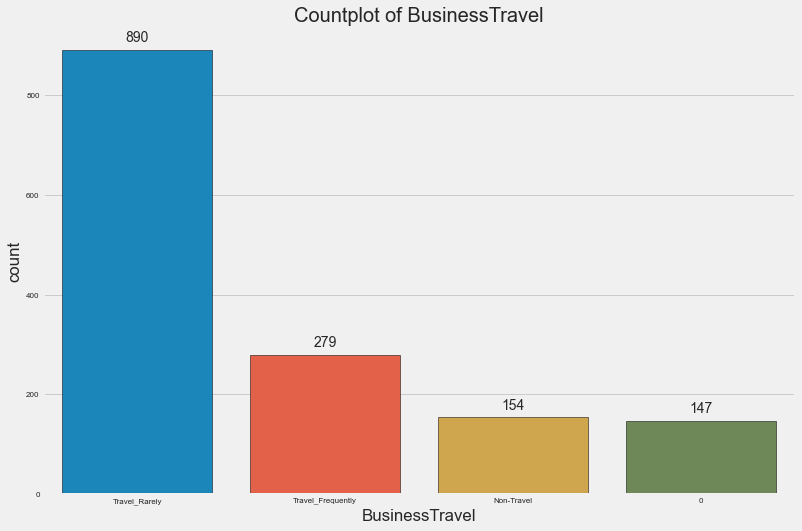

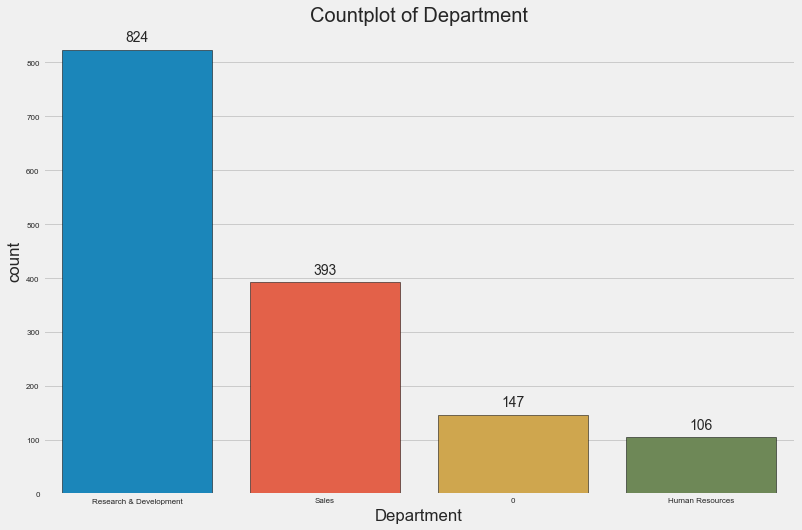

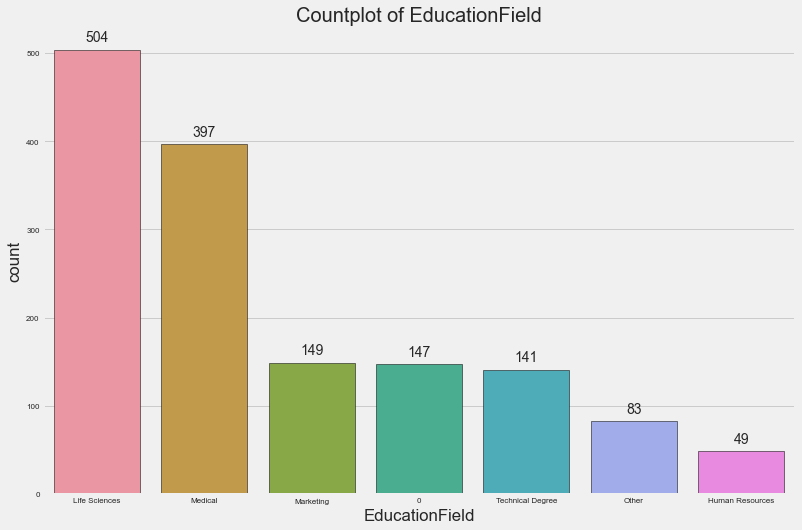

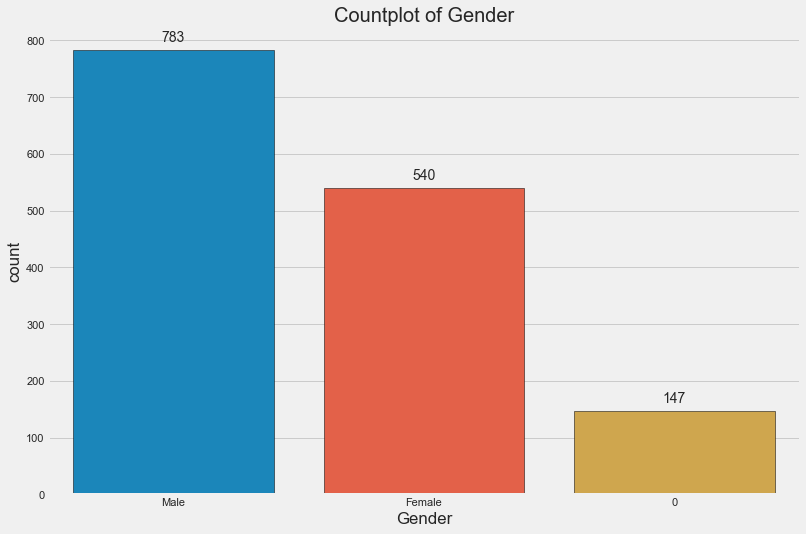

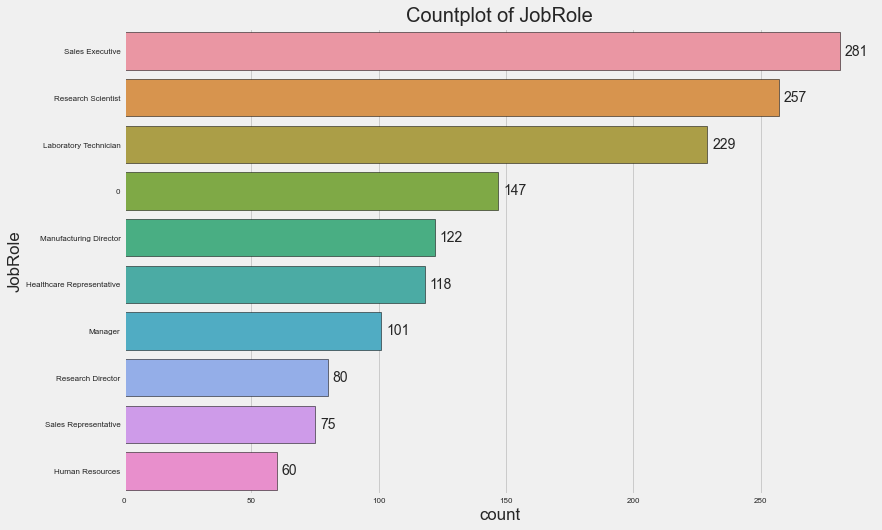

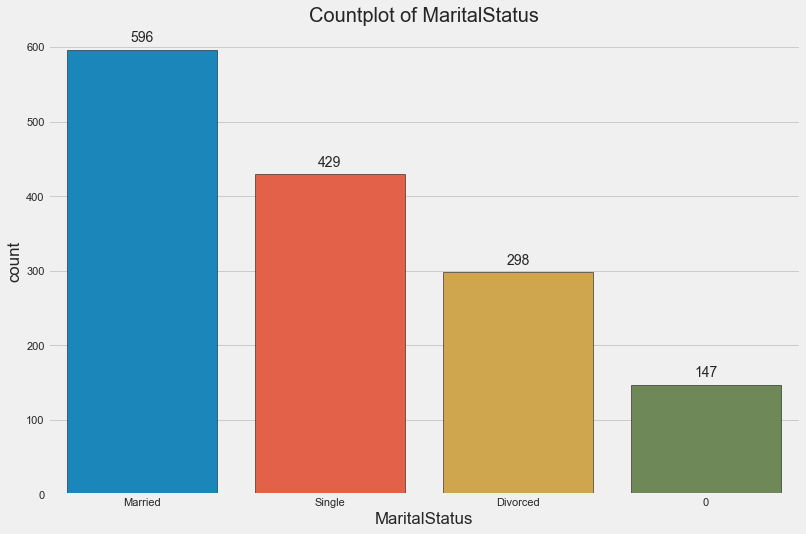

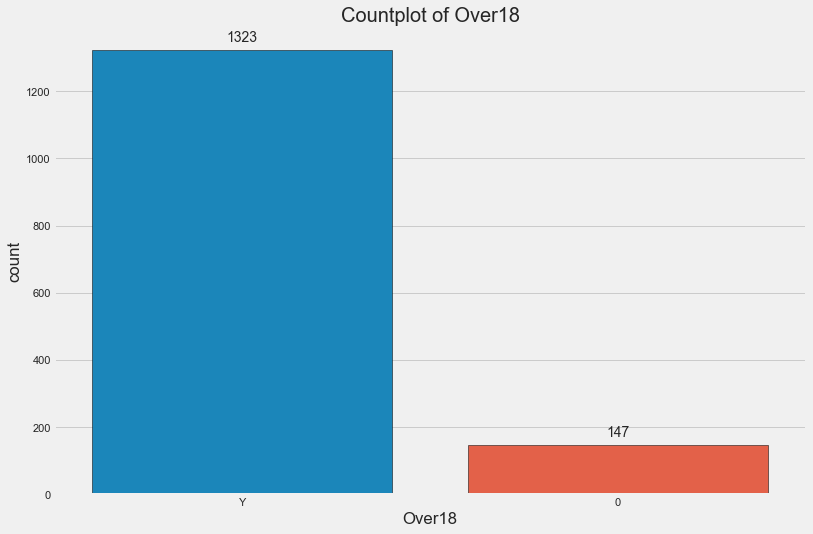

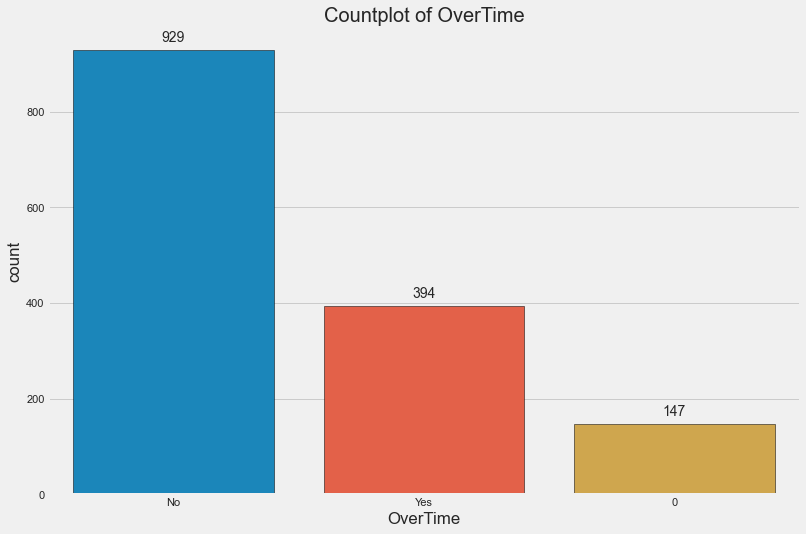

In [20]:
from fasteda import fast_eda
fast_eda(df1)

here important is correlations, we are checking outliers, we need to check the relationship btw the atritions, life ballance

Notes for correlations report:  more
monthly income 
job level
total working years// 
less
years at company
years current role
years since last promo
years with current manager// 

attition is dependent on the above indepent values...

below checking correlations 

<AxesSubplot:xlabel='JobLevel', ylabel='MonthlyIncome'>

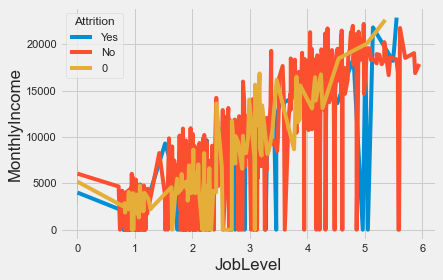

In [21]:
sns.lineplot(data=df1,x='JobLevel',y='MonthlyIncome',hue='Attrition')

<AxesSubplot:xlabel='JobLevel', ylabel='MonthlyIncome'>

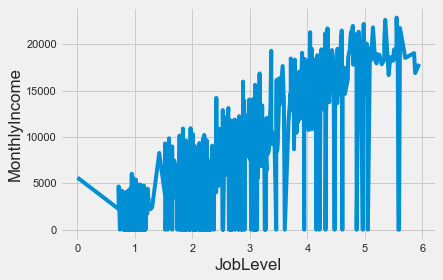

In [22]:
sns.lineplot(data=df1,x='JobLevel',y='MonthlyIncome')

<AxesSubplot:xlabel='JobLevel', ylabel='MonthlyIncome'>

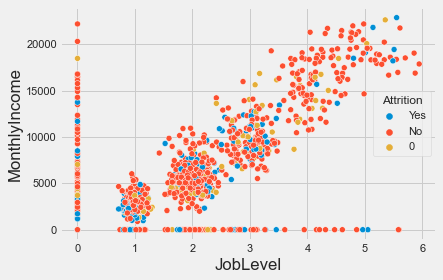

In [23]:
sns.scatterplot(data=df1,x='JobLevel',y='MonthlyIncome',hue='Attrition')

Feature eng is not required - TBD